In [ ]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.7/285.7 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.3/372.3 kB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 8.3 MB/s eta 0

In [ ]:
import pandas as pd
import random
import os
import numpy as np
from autogluon.tabular import TabularPredictor


train = pd.read_csv('/content/drive/MyDrive/2023/google_machinelearning_bootcamp/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/2023/google_machinelearning_bootcamp/data/test.csv')

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

SEED = 42
seed_everything(SEED) # Seed 고정

train = train.drop(['id'], axis = 1)
test = test.drop(['id'], axis = 1)

In [ ]:
predictor = TabularPredictor(label='defects', eval_metric='roc_auc',).fit(train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231013_083130/"
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231013_083130/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Aug 30 11:19:59 UTC 2023
Disk Space Avail:   80.06 GB / 115.66 GB (69.2%)
Train Data Rows:    101763
Train Data Columns: 21
Label Column: defects
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [False, True]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['

In [ ]:
ld_board = predictor.leaderboard(train, silent=True)
ld_board

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestGini,0.997939,0.780990,13.540951,0.348060,115.007342,13.540951,0.348060,115.007342,1,True,5
1,RandomForestEntr,0.997919,0.784404,13.322301,0.359037,117.571821,13.322301,0.359037,117.571821,1,True,6
2,KNeighborsDist,0.997249,0.719354,67.554838,3.559798,0.125215,67.554838,3.559798,0.125215,1,True,2
3,ExtraTreesEntr,0.989189,0.786686,14.626702,0.601165,42.665760,14.626702,0.601165,42.665760,1,True,9
4,ExtraTreesGini,0.986481,0.786344,16.503968,0.291768,45.062561,16.503968,0.291768,45.062561,1,True,8
5,KNeighborsUnif,0.878024,0.722029,77.818568,2.165882,3.715901,77.818568,2.165882,3.715901,1,True,1
6,WeightedEnsemble_L2,0.877995,0.801203,26.883022,0.714415,322.567924,0.009980,0.001091,0.989974,2,True,14
7,LightGBMLarge,0.853186,0.797974,2.016252,0.052000,7.788680,2.016252,0.052000,7.788680,1,True,13
8,LightGBM,0.818314,0.800122,1.954921,0.049766,7.058030,1.954921,0.049766,7.058030,1,True,4
9,XGBoost,0.811330,0.798018,0.462465,0.023288,3.480073,0.462465,0.023288,3.480073,1,True,11


In [ ]:
# predictor.fit_summary()

In [ ]:
pred_y = predictor.predict_proba(test)

In [ ]:
pred_y = pred_y.iloc[:,1]
pred_y

0        0.260247
1        0.192708
2        0.644444
3        0.472461
4        0.145597
           ...   
67837    0.277606
67838    0.120299
67839    0.172777
67840    0.095257
67841    0.794331
Name: True, Length: 67842, dtype: float64

In [ ]:
test

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,22636.74,...,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
1,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,14482.46,...,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
2,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,116160.08,...,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
3,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,16135.47,...,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
4,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,2624.49,...,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67837,41.0,1.0,1.0,1.0,125.0,656.55,0.07,14.00,47.61,8612.32,...,479.35,31,0,7,0,14.0,27.0,71.0,54.0,1.0
67838,20.0,3.0,1.0,3.0,38.0,161.42,0.15,6.75,23.28,1060.92,...,58.94,15,0,3,0,9.0,10.0,23.0,15.0,5.0
67839,24.0,2.0,1.0,2.0,52.0,240.00,0.11,9.00,26.67,2160.00,...,120.00,18,0,4,0,16.0,16.0,36.0,18.0,3.0
67840,18.0,2.0,1.0,1.0,49.0,216.64,0.11,9.33,24.02,2118.30,...,117.68,12,0,2,0,8.0,12.0,29.0,22.0,3.0


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/2023/google_machinelearning_bootcamp/data/test.csv')

submission = pd.DataFrame({'id': test['id'], 'defects': pred_y})

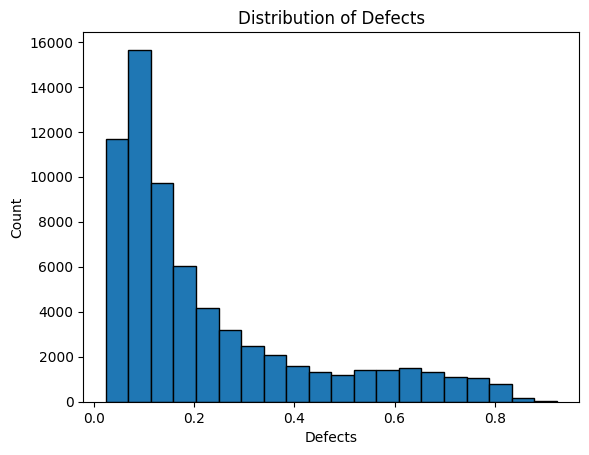

In [ ]:
import matplotlib.pyplot as plt

plt.hist(submission['defects'], bins=20, edgecolor='k')
plt.title('Distribution of Defects')
plt.xlabel('Defects')
plt.ylabel('Count')
plt.show()

In [ ]:
submission.to_csv('submission_v3.csv',index = False)